## Cuaderno de la práctica 1 de VC

### Autores
- Óscar Muñoz Hidalgo
- Juan José Quesada Acosta

---
Paquetes necesarios
---

In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

---
Inicializaciones
---

In [3]:
ancho = 800
alto = 800

---
Tablero de ajedrez
---

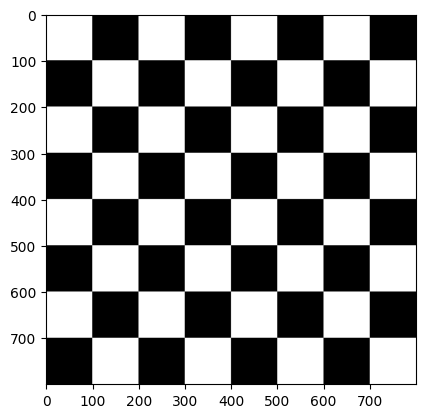

In [21]:
gris_img = np.zeros((alto,ancho,1), dtype = np.uint8)

for i in range(0, 8):
    for j in range(0, 8):
        if ((i+j)%2)==0:
            lim_arriba = int(i*alto/8)
            lim_abajo = int((i+1)*alto/8)
            lim_izqda = int(j*ancho/8)
            lim_dcha = int((j+1)*ancho/8)

            gris_img[lim_arriba:lim_abajo, lim_izqda:lim_dcha] = 255

plt.imshow(gris_img, cmap='gray')
plt.show()

---
Mondrian
---

Creación de la imagen con 3 planos de color

In [22]:
import random
import cv2  
import numpy as np
import matplotlib.pyplot as plt

ancho = 800
alto = 800

color_img = np.zeros((alto,ancho,3), dtype = np.uint8)
color_img[:,:,0] = 255 
color_img[:,:,1] = 255 #Prueba otras combinaciones
color_img[:,:,2] = 255


Generación del patrón aleatorio (a veces da un resultado "curioso")

[[436, 796, 149, 670, 2], [286, 783, 321, 605, 3], [74, 770, 58, 495, 3], [67, 573, 298, 776, 1], [221, 637, 95, 499, 3], [188, 740, 140, 454, 3], [100, 435, 275, 571, 1], [135, 795, 45, 507, 0], [31, 507, 37, 794, 1], [22, 328, 254, 573, 2]]


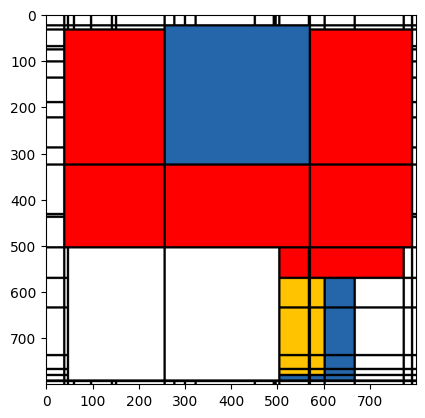

In [23]:
girth = 5
number_of_squares = random.randint(4,10)
squares = []
for i in range(0, number_of_squares):
    arriba = random.randint(0, alto)
    abajo = random.randint(0, alto)
    izqda = random.randint(0, ancho)
    dcha = random.randint(0, ancho)
    color = random.randint(0,3)
    
    while (abs(arriba - abajo) <= alto/10) or (abs(arriba - abajo) <= alto/3):
        arriba = random.randint(0, alto)
        abajo = random.randint(0, alto)
    while (abs(izqda - dcha) <= ancho/10) or (abs(dcha - izqda) <= ancho/3):
        izqda = random.randint(0, ancho)
        dcha = random.randint(0, ancho)

    squares.append([min(arriba, abajo), max(arriba, abajo), min(izqda, dcha), max(dcha, izqda), color])
print(squares)

#En vez de generar primero los cuadrados y después pintarlos y generar las líneas posteriormente se podría hacer de la siquiente forma:
#Generar primero las líneas, elegir los cuadrados y rellenarlos
for square in squares:
    #Relleno
    color = square[4]
    if color == 0:
        color_img[square[0]:square[1], square[2]:square[3], 0] = 255
        color_img[square[0]:square[1], square[2]:square[3], 1] = 255
        color_img[square[0]:square[1], square[2]:square[3], 2] = 255
    if color == 1:
        color_img[square[0]:square[1], square[2]:square[3], 0] = 255
        color_img[square[0]:square[1], square[2]:square[3], 1] = 0
        color_img[square[0]:square[1], square[2]:square[3], 2] = 0
    if color == 2:
        color_img[square[0]:square[1], square[2]:square[3], 0] = 37
        color_img[square[0]:square[1], square[2]:square[3], 1] = 102
        color_img[square[0]:square[1], square[2]:square[3], 2] = 171
    if color == 3:
        color_img[square[0]:square[1], square[2]:square[3], 0] = 255
        color_img[square[0]:square[1], square[2]:square[3], 1] = 195
        color_img[square[0]:square[1], square[2]:square[3], 2] = 0
    
    #Bordes
    color_img[square[0]:(square[0]+girth), 0:ancho, 0] = 0
    color_img[square[0]:(square[0]+girth), 0:ancho, 1] = 0
    color_img[square[0]:(square[0]+girth), 0:ancho, 2] = 0

    color_img[square[1]-girth:(square[1]), 0:ancho, 0] = 0
    color_img[square[1]-girth:(square[1]), 0:ancho, 1] = 0
    color_img[square[1]-girth:(square[1]), 0:ancho, 2] = 0

    color_img[0:alto, square[2]:(square[2]+girth), 0] = 0
    color_img[0:alto, square[2]:(square[2]+girth), 1] = 0
    color_img[0:alto, square[2]:(square[2]+girth), 2] = 0

    color_img[0:alto, square[3]-girth:(square[3]), 0] = 0
    color_img[0:alto, square[3]-girth:(square[3]), 1] = 0
    color_img[0:alto, square[3]-girth:(square[3]), 2] = 0



    


plt.imshow(color_img) 
plt.show()

---
Tarea previa con funciones de dibujo de OpenCV
---

Tablero de ajedrez

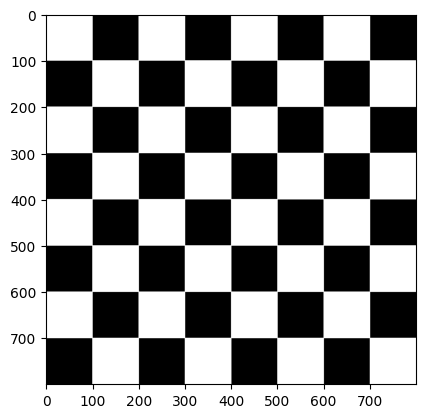

In [32]:
gris_img = np.zeros((alto,ancho,1), dtype = np.uint8)

for i in range(0, 8):
    for j in range(0, 8):
        if ((i+j)%2)==0:
            lim_arriba = int(i*alto/8)
            lim_abajo = int((i+1)*alto/8)
            lim_izqda = int(j*ancho/8)
            lim_dcha = int((j+1)*ancho/8)

            cv2.rectangle(gris_img, (lim_izqda,lim_arriba), (lim_dcha,lim_abajo), 255, -1)

plt.imshow(gris_img, cmap='gray')
plt.show()

---
Modificar los valores de un plano de la imagen
---

En nuestro caso, modificamos el plano rojo y el verde

In [33]:
vid = cv2.VideoCapture(0)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Separamos canales
        b = frame[:,:,0]
        g = frame[:,:,1]
        r = frame[:,:,2]
        #Dimensiones imagen de entrada
        h, w, c = frame.shape

        # Modificamos el plano rojo añadiendo una cuadricula con celdas de 10x10 pixeles
        r_copy = r.copy()

        for i in range(0, h, 10):
            r_copy[i,:] = 255
        for i in range(0, w, 10):
            r_copy[:,i] = 255


        # Modificamos el plano verde añadiendo un patrón de puntos
        g_copy = g.copy()
        for i in range(0, h, 10):
            for j in range(0, w, 10):
                if i + j < h:
                    g_copy[i + j, j] = 255
                if i + j < w:
                    g_copy[i, i + j] = 255

        #Concateamos en horizontal los tres planos del fotograma
        collage = np.hstack((r_copy, g_copy, b))
    
        # Muestra fotograma redimensionando a la mitad para que quepa en pantalla
        cv2.imshow('RGB', cv2.resize(collage, (int(w*1.5),int(h/2)),cv2.INTER_NEAREST))
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

---
Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen
---


Pixel más claro y más oscuro

In [19]:
vid = cv2.VideoCapture(0)
while(True):
    ret,frame = vid.read()
    if ret:
        frame_grey_scale = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        min_value,max_value,min_coords,max_coords = cv2.minMaxLoc(frame_grey_scale)

        cv2.circle(frame,(min_coords), 7, (0,0,255), 2)
        cv2.circle(frame,(max_coords), 7, (255,0,0), 2)
        # Muestra fotograma redimensionando a la mitad para que quepa en pantalla
        cv2.imshow('Max and Min pixel values', frame)


    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

Zonas 8x8 más claras y más oscuras

In [ ]:
a

---
Propuesta de Pop Art
---

Cuadrícula 3x3

In [20]:
vid = cv2.VideoCapture(0)

#Dimensiones de la cámara
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

#Fuerzo a mitad de resolución para ocupar menos pantalla
w=int(w/3)
h=int(h/3)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w) #En Mac no reacciona a estos comandos
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

#Imagen conjunta 2x original
collage = np.zeros((h*3,w*3,3), dtype = np.uint8)
top_left = collage[0:h,0:w]
top_center = collage[0:h,w:2*w]
top_right = collage[0:h,2*w:3*w]

center_left = collage[h:2*h,0:w]
center_center = collage[h:2*h,w:2*w]
center_right = collage[h:2*h,2*w:3*w]

bottom_left = collage[2*h:3*h,0:w]
bottom_center = collage[2*h:3*h,w:2*w]
bottom_right = collage[2*h:3*h,2*w:3*w]

while True:      
    # fotograma a fotograma
    ret, frameIN = vid.read()

    #Menor tamaño
    frame = cv2.resize(frameIN, (int(w),int(h)),cv2.INTER_NEAREST)

    if ret:
        #Separamos canales
        r = frame[:,:,2]
        g = frame[:,:,1]
        b = frame[:,:,0]

        #Jugamos con los valores de los planos

        top_left[:,:,0] = b
        top_left[:,:,1] = g
        top_left[:,:,2] = r

        top_center[:,:,0] = 255 - r
        top_center[:,:,1] = g
        top_center[:,:,2] = b

        top_right[:,:,0] = r
        top_right[:,:,1] = g
        top_right[:,:,2] = 255 - b


        center_left[:,:,0] = 255
        center_left[:,:,1] = np.minimum(g*2, 255).astype(np.uint8)  # Aumentar verde al doble
        center_left[:,:,2] = 255 - r # Invertir el canal rojo

        center_center[:,:,0] = b
        center_center[:,:,1] = g
        center_center[:,:,2] = 255 - r

        center_right[:,:,0] = np.minimum(b // 4, 255).astype(np.uint8)  # Reducir azul para dar paso a amarillo
        center_right[:,:,1] = np.minimum(g * 2, 255).astype(np.uint8)  # Aumentar verde al doble
        center_right[:,:,2] = np.minimum(r * 2, 255).astype(np.uint8)  # Aumentar rojo al doble para crear amarillo


        bottom_left[:,:,0] = 255 - b # Invertir el azul
        bottom_left[:,:,1] = 255 - g # Invertir el verde
        bottom_left[:,:,2] = np.minimum(r * 2, 255).astype(np.uint8) # Doblar la intensidad del rojo

        bottom_center[:,:,0] = np.minimum(b // 5, 255).astype(np.uint8)  # Reducir mucho el azul
        bottom_center[:,:,1] = np.minimum(g * 3, 255).astype(np.uint8)  # Aumentar el verde al triple
        bottom_center[:,:,2] = np.minimum(r // 5, 255).astype(np.uint8)  # Reducir mucho el rojo

        bottom_right[:,:,0] = np.minimum(b * 2, 255).astype(np.uint8)
        bottom_right[:,:,1] = np.minimum(g * 2, 255).astype(np.uint8)
        bottom_right[:,:,2] = np.minimum(r * 2, 255).astype(np.uint8)

    
        # Muestra composición
        cv2.imshow('Cam', collage)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()